# Box Cox Transform

**Box Cox Transformation is only applicable to numbers greater than 0. 0 is excluded in the range.**
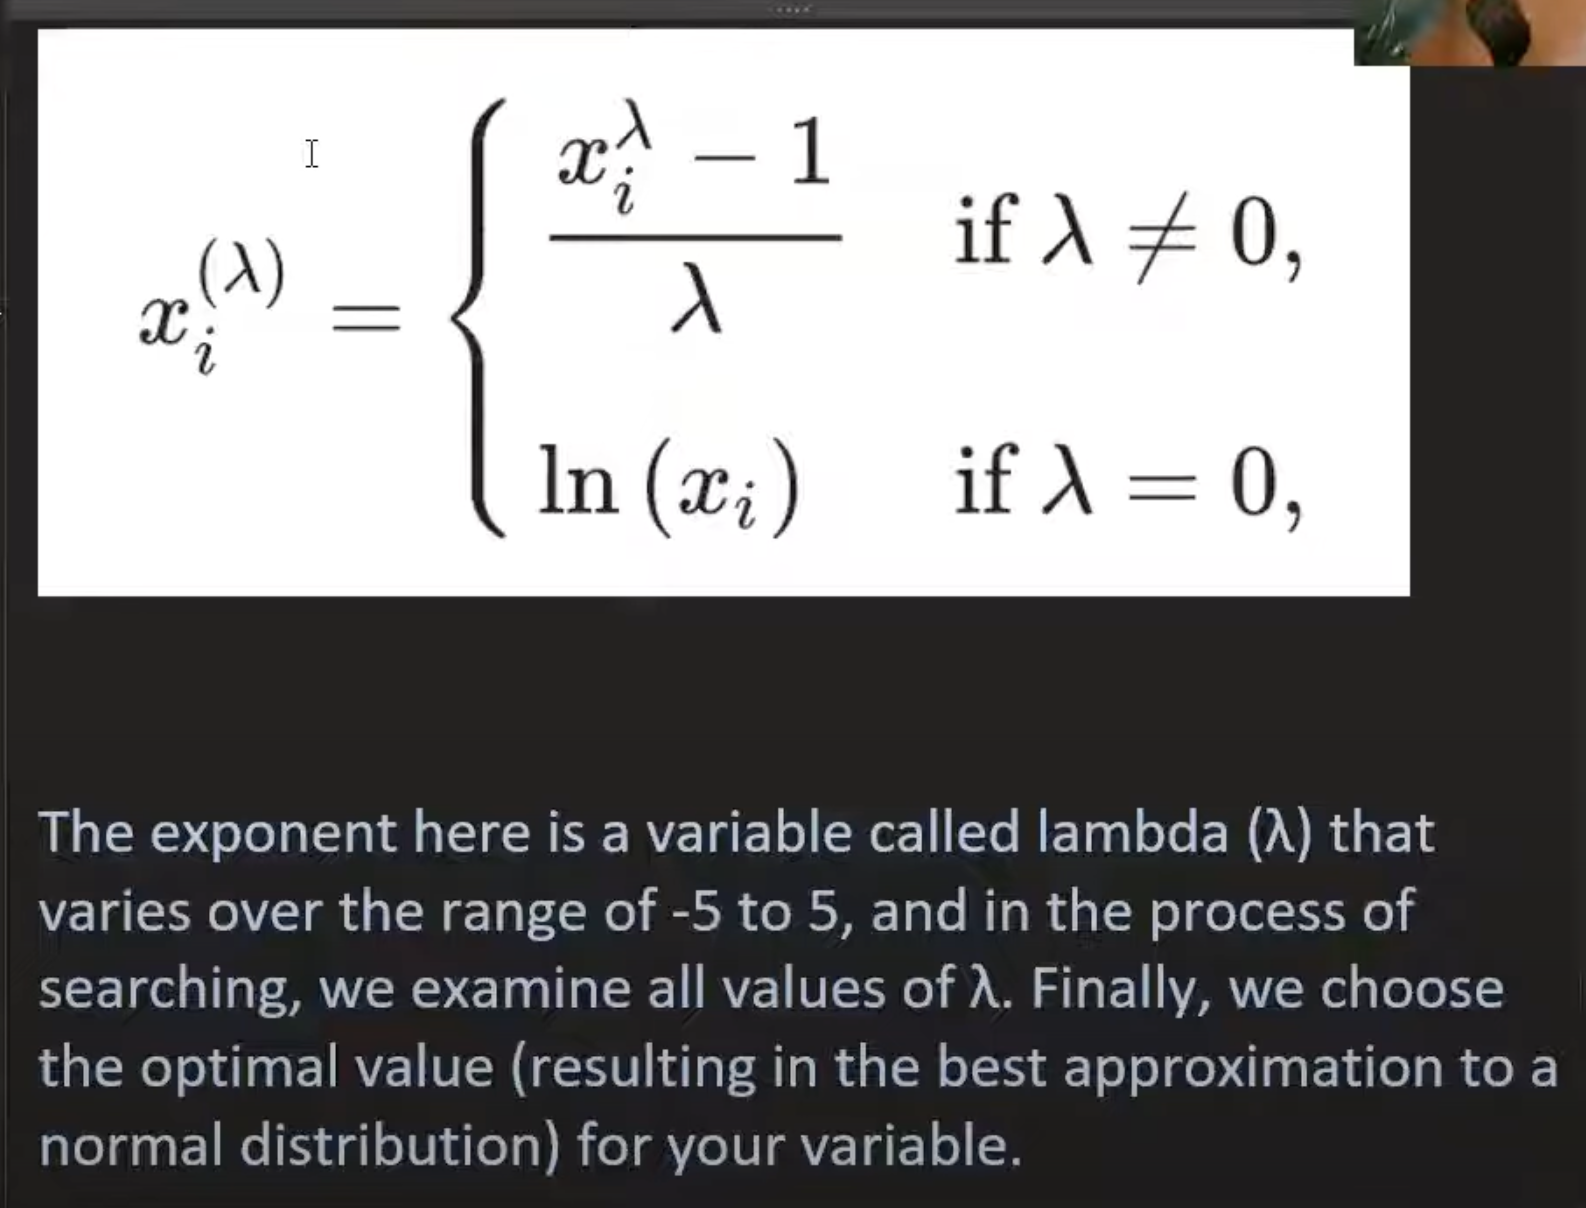

# Yeo-Johnson Transform

**The above limitation of Box Cox transform is resloved with the help of Yeo-Johnson Transform**

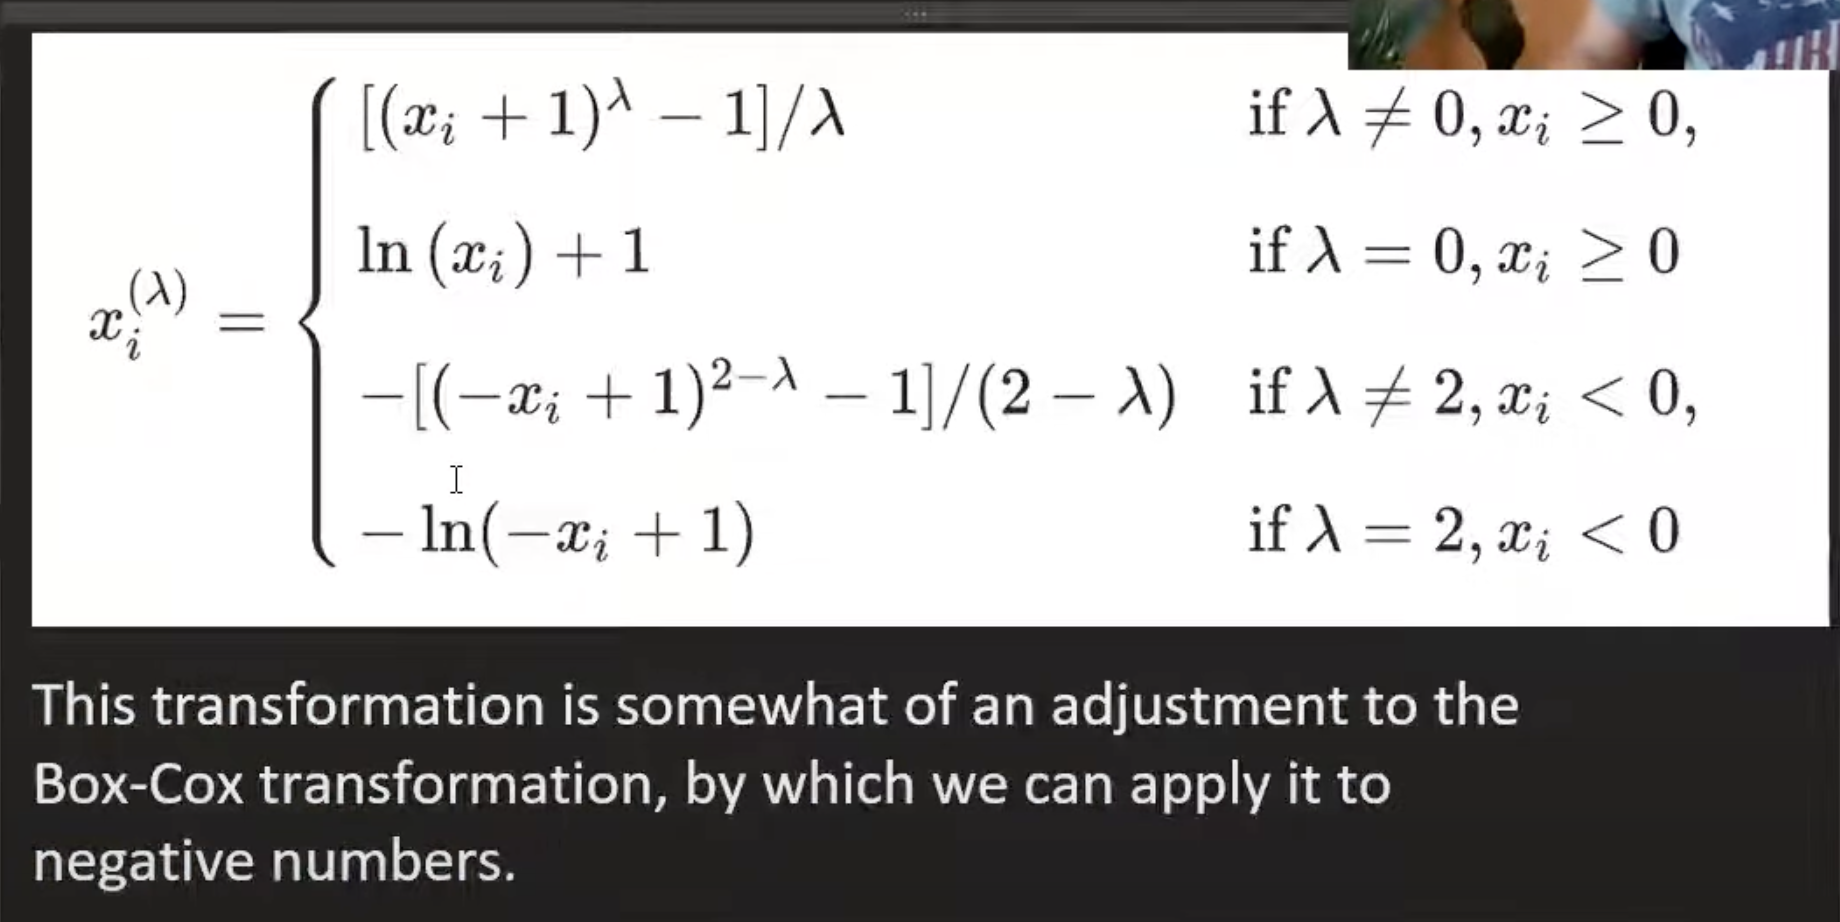

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer

In [8]:
df = pd.read_csv('concrete_data.csv')

In [9]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [10]:
df.shape

(1030, 9)

In [12]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [13]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(df.drop('Strength', axis =1 ),
                                                    df['Strength'],
                                                    test_size = 0.2,
                                                    random_state = 42)

In [15]:
X_train

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
995,158.6,148.9,116.0,175.1,15.0,953.3,719.7,28
507,424.0,22.0,132.0,178.0,8.5,822.0,750.0,28
334,275.1,0.0,121.4,159.5,9.9,1053.6,777.5,3
848,252.0,97.0,76.0,194.0,8.0,835.0,821.0,28
294,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,3
...,...,...,...,...,...,...,...,...
87,286.3,200.9,0.0,144.7,11.2,1004.6,803.7,3
330,246.8,0.0,125.1,143.3,12.0,1086.8,800.9,14
466,190.3,0.0,125.2,166.6,9.9,1079.0,798.9,100
121,475.0,118.8,0.0,181.1,8.9,852.1,781.5,28


In [19]:
# Performing linear regression directly
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

r2_score(y_test, y_pred)

0.6275531792314851

In [20]:
# Performing cross validation
X = df.drop('Strength', axis = 1)
Y = df.iloc[:, -1]

lr = LinearRegression()
np.mean(cross_val_score(lr, X, Y, scoring = 'r2'))

0.4609940491662865

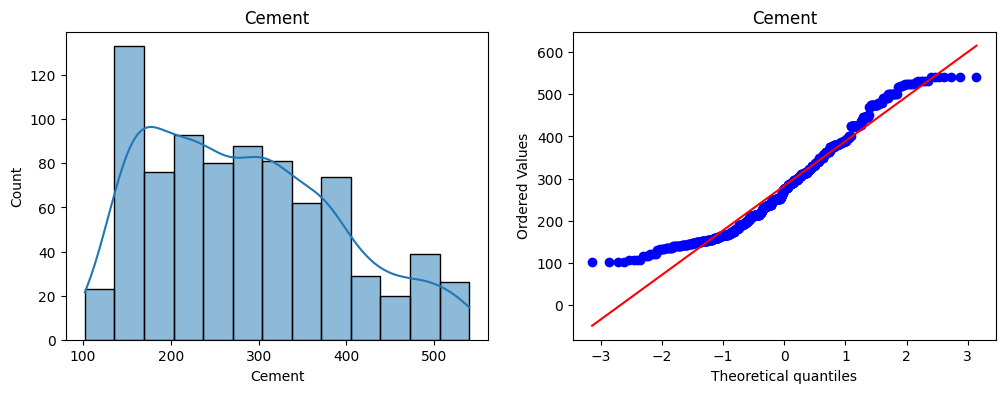

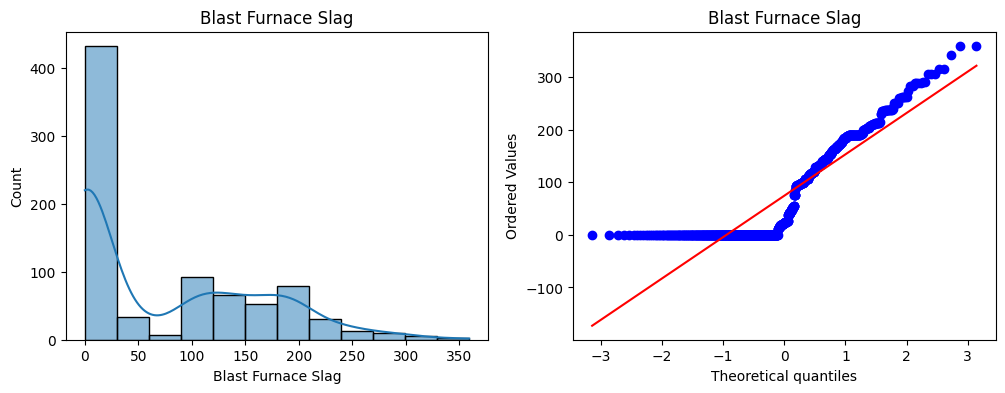

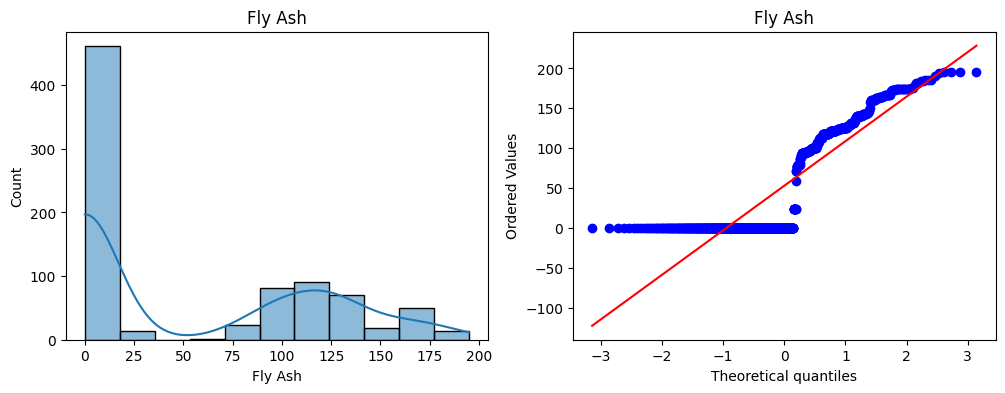

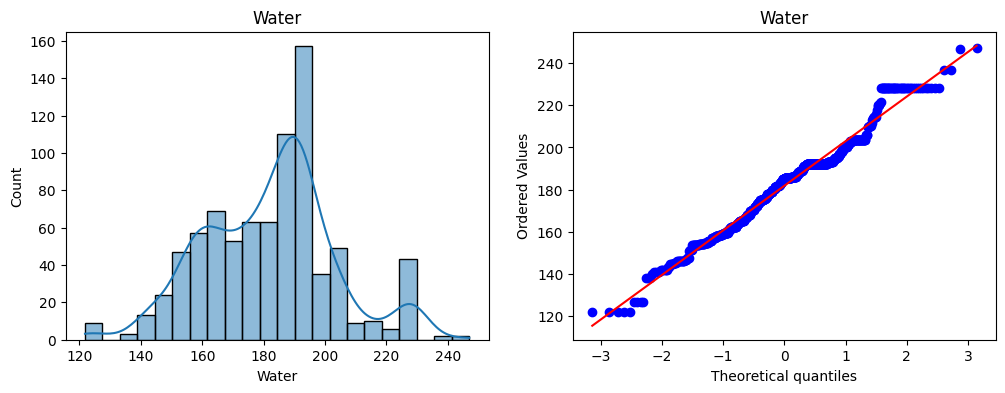

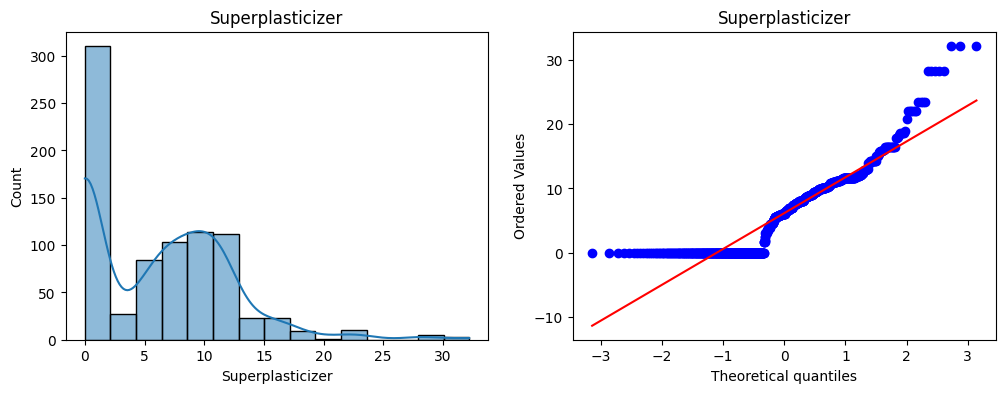

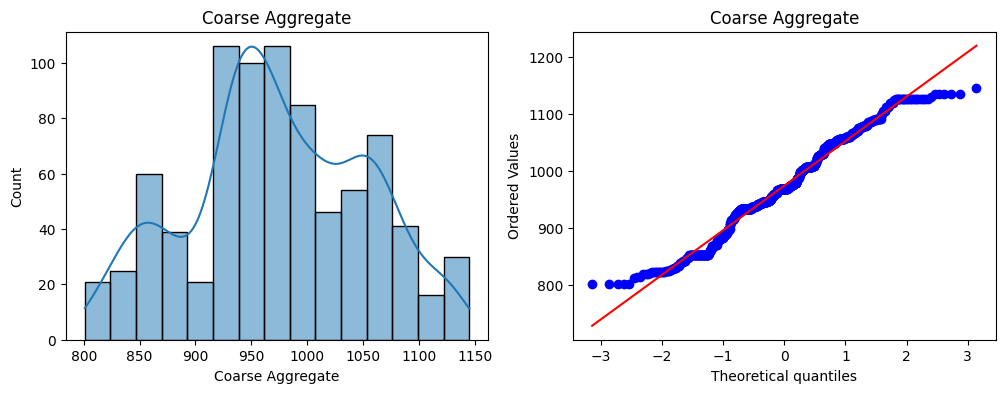

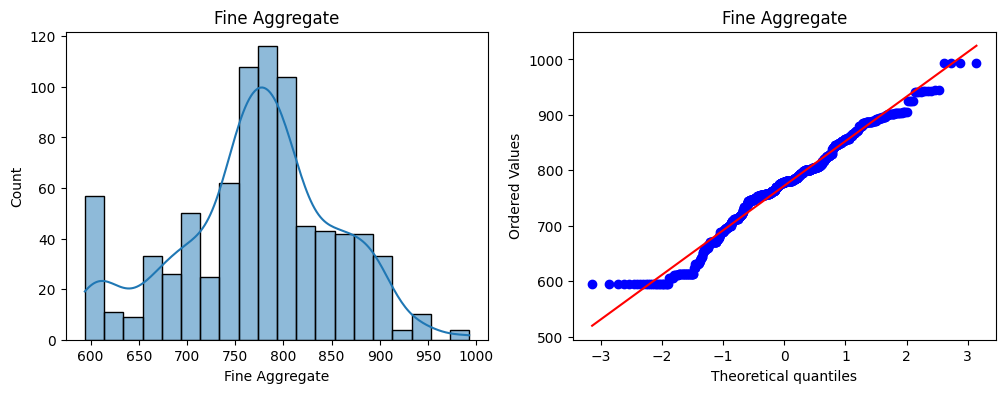

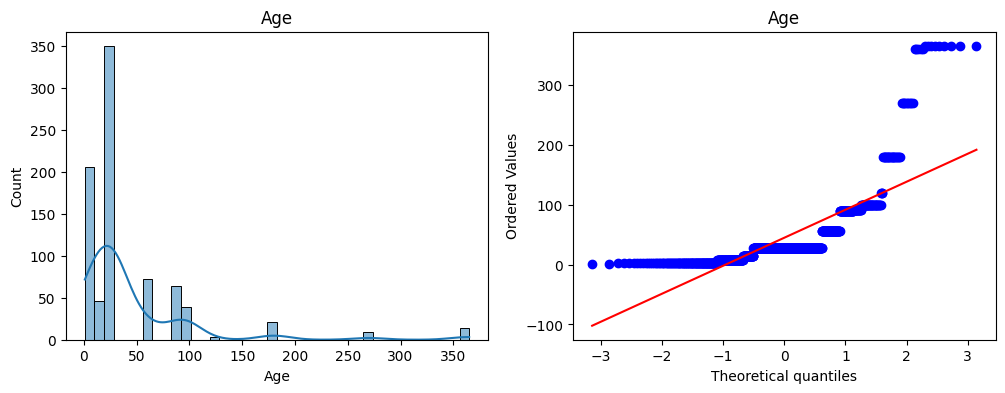

In [38]:
# Plotting all the columns to understand the distribution of each column


for col in X_train.columns:
    plt.figure(figsize = (12, 4))
    plt.subplot(121)
    sns.histplot(X_train[col], kde = True)
#     sns.displot(data=X_train[col], kde=True)
    plt.title(col)
    
    plt.subplot(122)
    stats.probplot(X_train[col], dist = 'norm', plot = plt)
    plt.title(col)
    
    plt.show()
    
    

# Performing Power Transformer

As per the manual, there is internal standard scaler. Which is True is by default. SO we dont need to perform standard scalar when using the BOX-COX transformer as it it will internally standardize.
Moreover By default the method is Yeo-Johnson Transform. So if we need to apply box-cox transformation we need to manually specify it.



In [39]:
# As we know have o in the data set we need to add 0.000001
pt = PowerTransformer(method = 'box-cox')

X_train_transformed = pt.fit_transform(X_train + 0.000001)
X_test_transformed = pt.transform(X_test + 0.000001)


In [41]:
pd.DataFrame({'col': X_train.columns, 'box_cox_lambdas': pt.lambdas_})

,col,box_cox_lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.025093
2,Fly Ash,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782019
7,Age,0.066631


In [42]:
# Applying linear regression data
lr = LinearRegression()

lr.fit(X_train_transformed, y_train)

y_pred = lr.predict(X_test_transformed)

r2_score(y_test, y_pred)

0.8047825006181188

In [44]:
pt = PowerTransformer(method = 'box-cox')

X_transformed = pt.fit_transform(X + 0.000001)


lr = LinearRegression()
np.mean(cross_val_score(lr, X_transformed, Y, scoring = 'r2'))

0.6662950327879322

In [49]:
X_train_transformed

array([[-1.27975148,  0.9561511 ,  1.12804495, ..., -0.26250009,
        -0.67756848,  0.10600969],
       [ 1.24470595,  0.70199412,  1.13757676, ..., -1.91272788,
        -0.31406222,  0.10600969],
       [ 0.07984237, -1.08566729,  1.13140696, ...,  1.01840672,
         0.02595742, -1.67597001],
       ...,
       [-0.84451727, -1.08566729,  1.13368097, ...,  1.34536666,
         0.29715692,  1.24673336],
       [ 1.5656235 ,  0.92549636, -0.88721185, ..., -1.53725478,
         0.07621108,  0.10600969],
       [ 0.42655631, -1.08566729,  1.12610617, ..., -0.62083415,
         0.09510818,  0.10600969]])

In [50]:
X_df_transformed = pd.DataFrame(X_train_transformed, columns = X_train.columns)

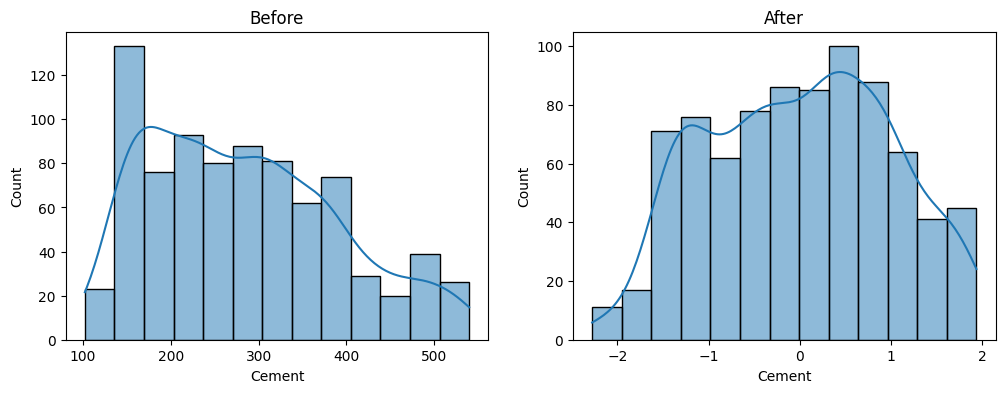

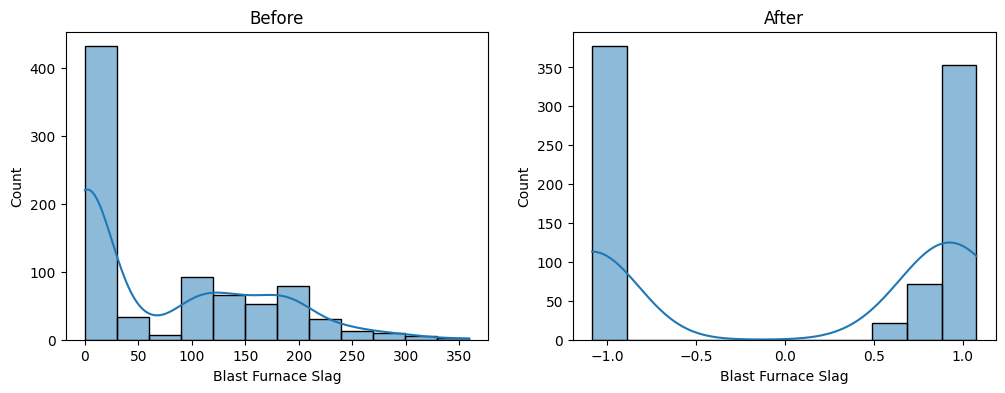

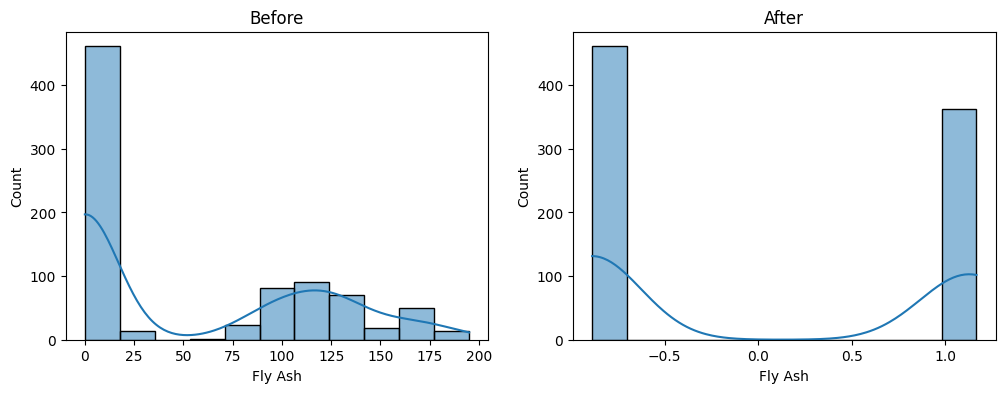

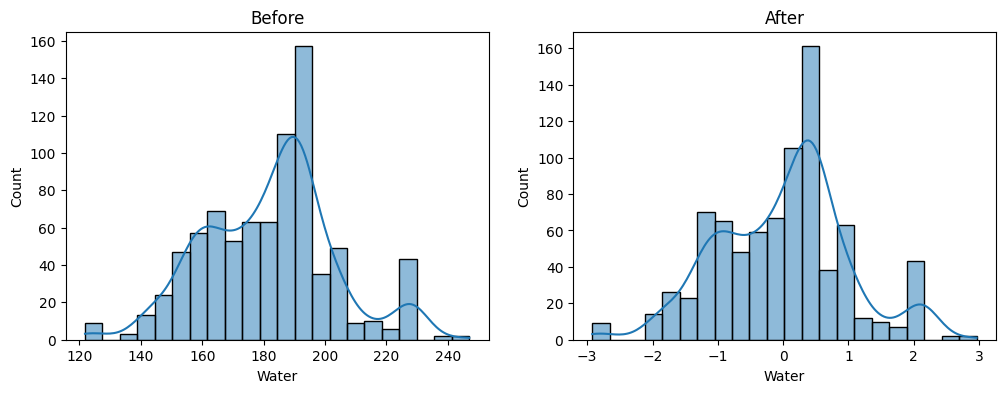

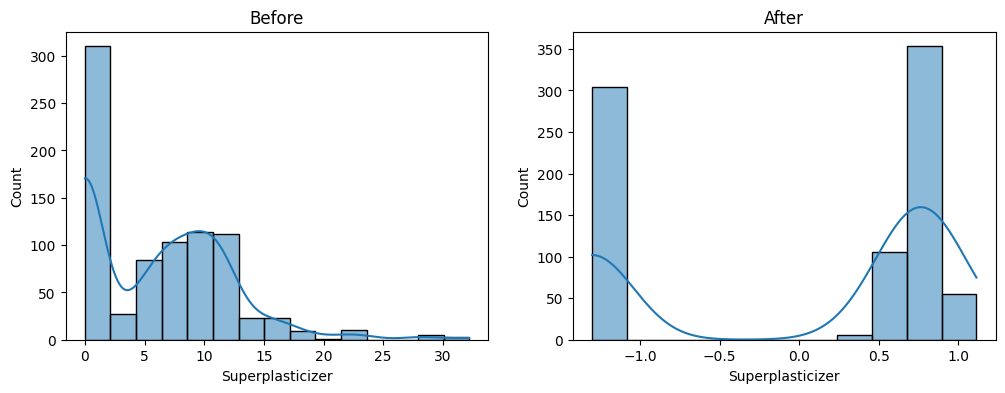

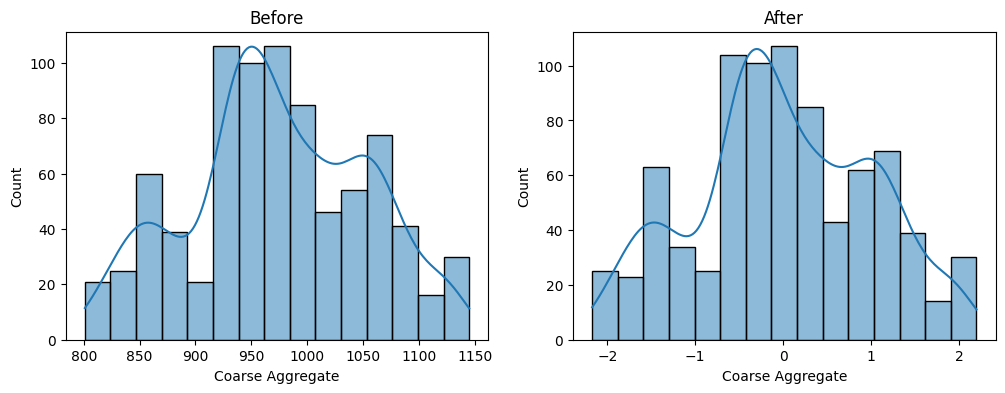

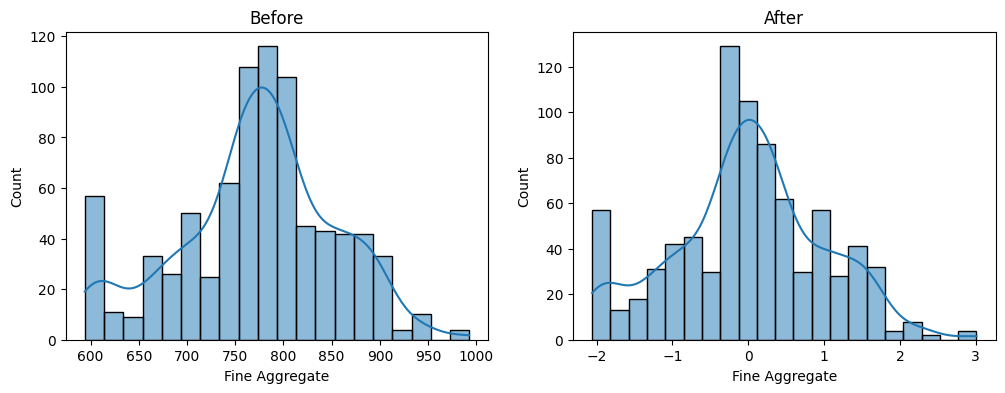

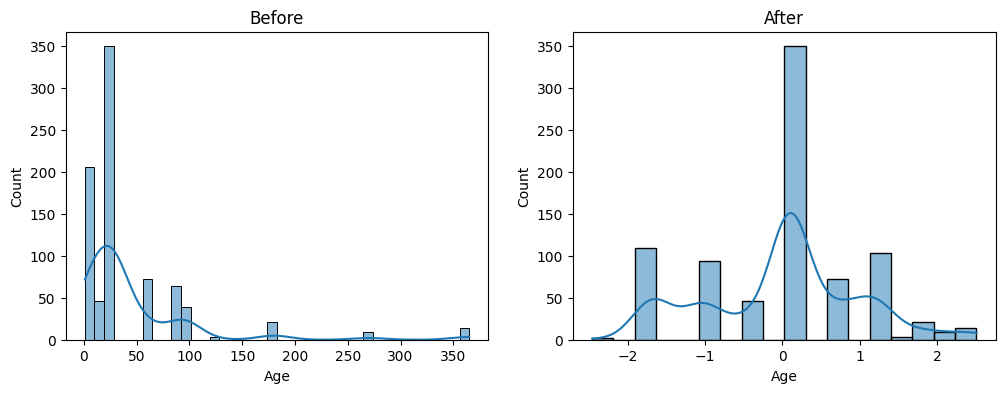

In [52]:
# Plotting all the columns to understand the distribution of each column


for col in X_df_transformed.columns:
    plt.figure(figsize = (12, 4))
    plt.subplot(121)
    sns.histplot(X_train[col], kde = True)
    plt.title("Before")
    
    plt.subplot(122)
    sns.histplot(X_df_transformed[col], kde = True)
    plt.title("After")
    
    plt.show()
    
    

In [57]:
# Apply Yeo-Johnson transform

# As we know have o in the data set we need to add 0.000001
pt1 = PowerTransformer(method = 'yeo-johnson')

X_train_transformed1 = pt1.fit_transform(X_train)
X_test_transformed1 = pt1.transform(X_test)

# Applying linear regression data
lr = LinearRegression()

lr.fit(X_train_transformed1, y_train)

y_pred2 = lr.predict(X_test_transformed1)

r2_score(y_test, y_pred2)


0.8161906513339304

In [59]:
pt2 = PowerTransformer()

X_transformed2 = pt2.fit_transform(X)


lr = LinearRegression()
np.mean(cross_val_score(lr, X_transformed2, Y, scoring = 'r2'))

0.6834625141500862

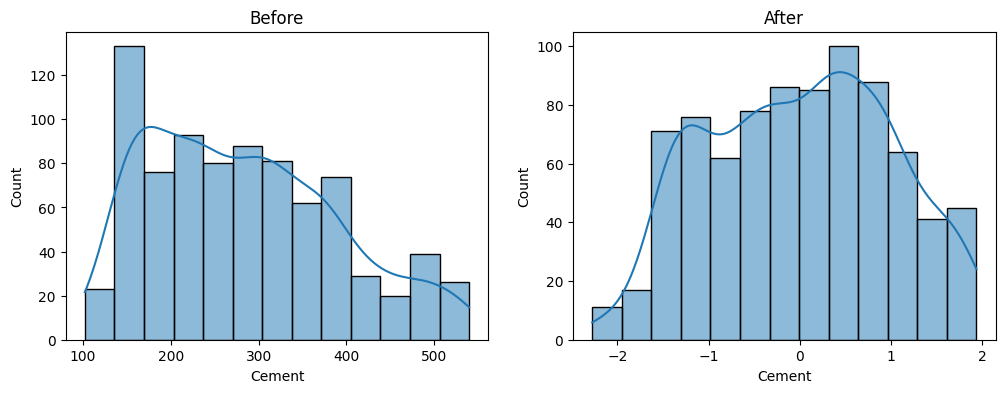

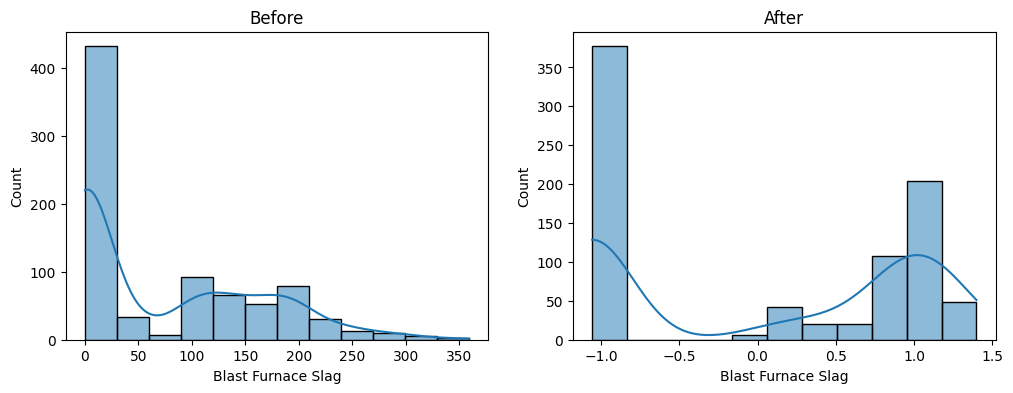

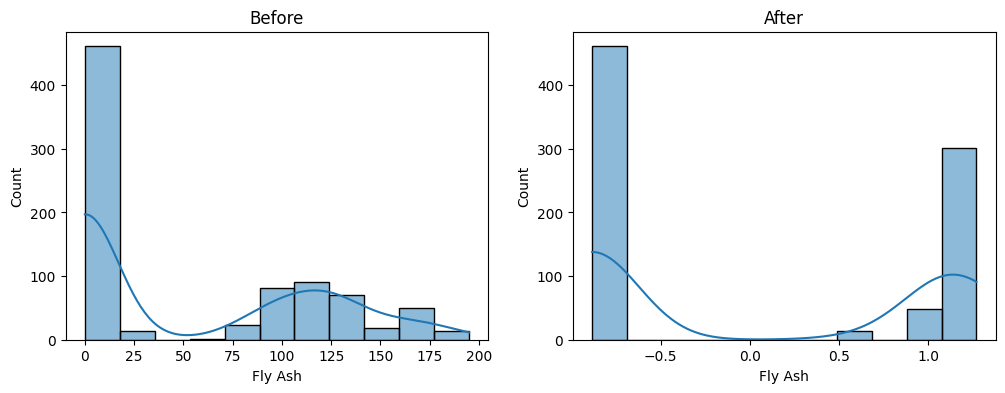

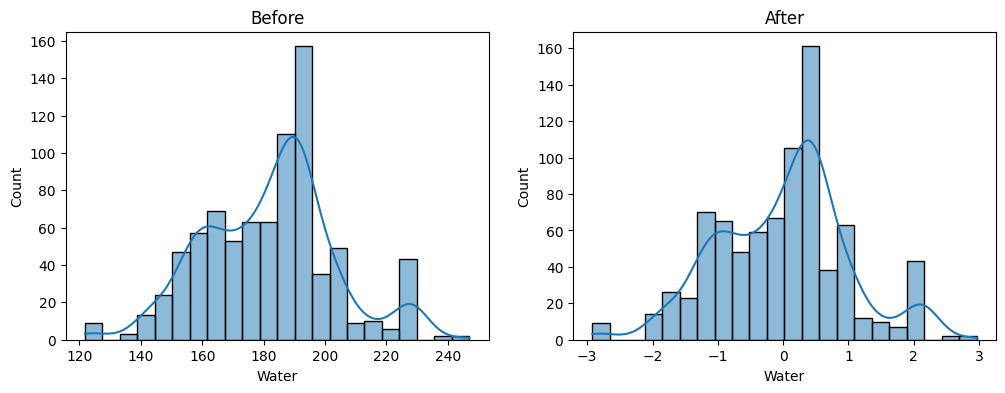

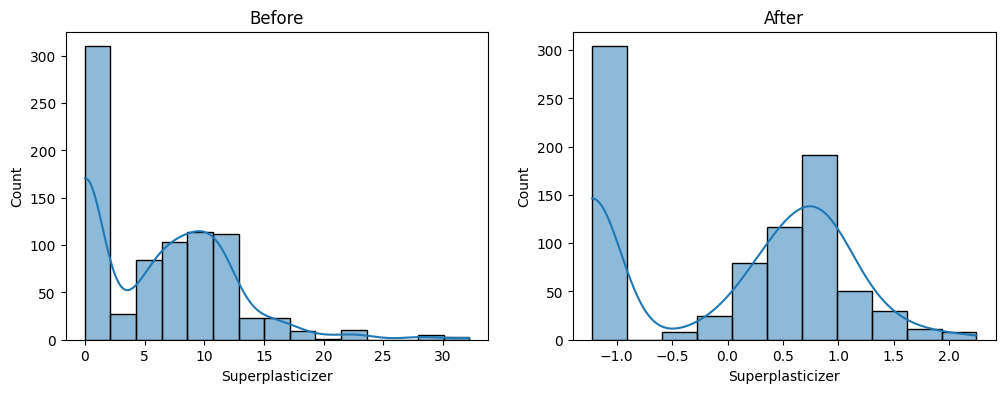

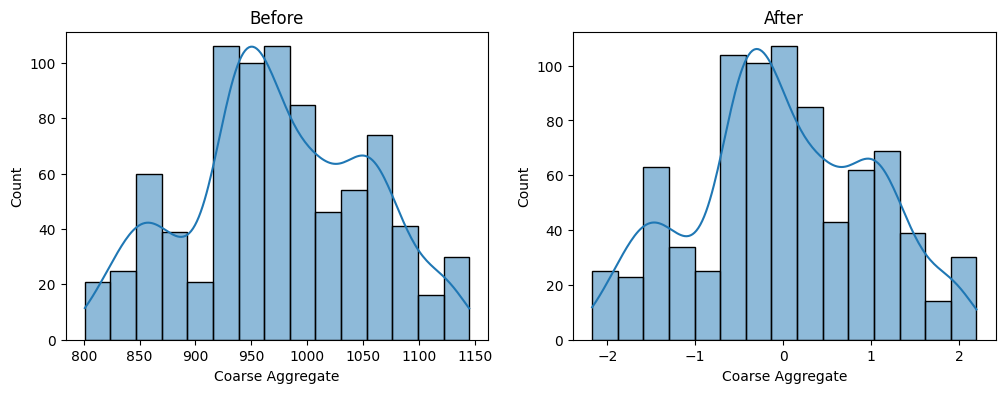

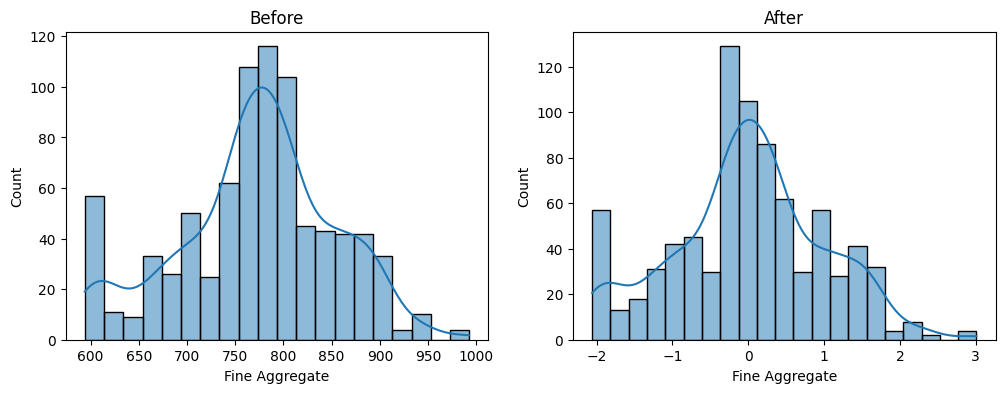

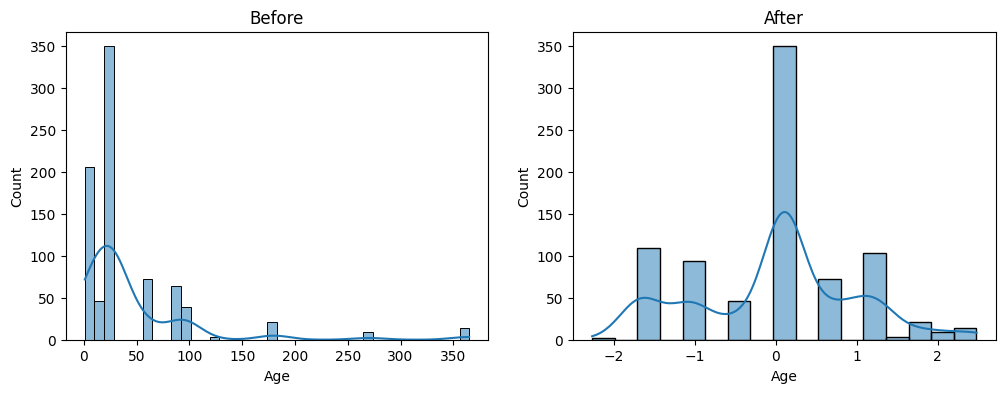

In [62]:
X_df_transformed1 = pd.DataFrame(X_train_transformed1, columns = X_train.columns)

# Plotting all the columns to understand the distribution of each column


for col in X_df_transformed1.columns:
    plt.figure(figsize = (12, 4))
    plt.subplot(121)
    sns.histplot(X_train[col], kde = True)
    plt.title("Before")
    
    plt.subplot(122)
    sns.histplot(X_df_transformed1[col], kde = True)
    plt.title("After")
    
    plt.show()